In [1]:
import os
import numpy as np
import pickle
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
files = os.listdir("so")

sf_full = []
for file in files:
    infile = open(f"so/{file}", "rb")
    sf = pickle.load(infile); infile.close()
    sf_full.append(sf)
sf_full = np.array(sf_full)
sf_full = np.flip(sf_full, axis=0)
lats = [f.split("_")[0] for f in files]

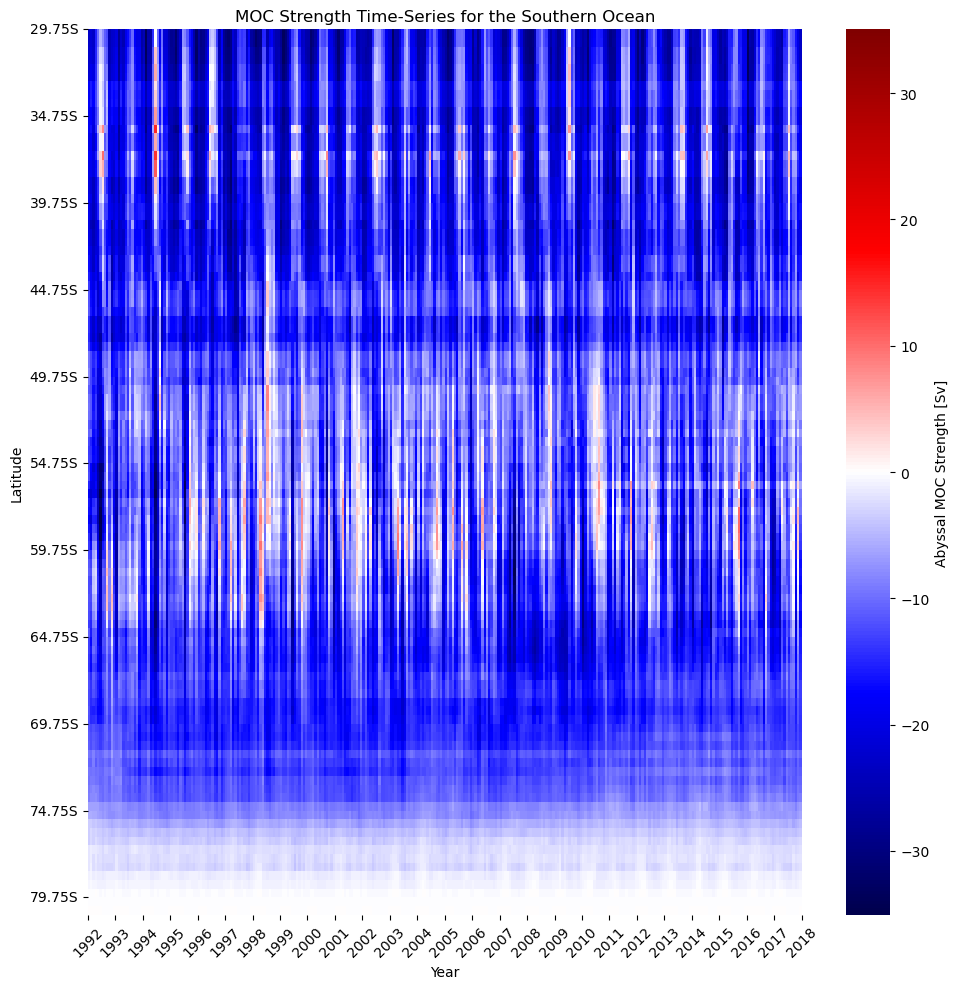

In [3]:
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(1, 1, 1)
maximum = np.max(abs(sf_full))
ax = sns.heatmap(sf_full, vmin=-maximum, vmax=maximum, cmap="seismic", cbar=True,
                 cbar_kws={"label": "Abyssal MOC Strength [Sv]"})
ax.set_xlabel("Year"); ax.set_ylabel("Latitude")
ax.set_title("MOC Strength Time-Series for the Southern Ocean")
ax.set_xticks(np.arange(0, 324, 12), np.arange(1992, 2019), rotation=45)
ax.set_yticks(np.arange(0, len(lats), 10), lats[::-10])
plt.tight_layout()
plt.savefig("plots_so/so.png", dpi=400)
plt.show()